# Explore here

In [3]:
#Imports
!pip install pandas
import pandas as pd 
!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder
import numpy as np 
!pip install matplotlib
import matplotlib.pyplot as plt 
!pip install seaborn 
import seaborn as sns
from sklearn.model_selection import train_test_split
!pip install statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
!pip install xgboost 
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because norma

LOADING THE DATA

In [21]:
#Quick fix for unnamed index columns using iloc
df = pd.read_csv('/workspaces/JMP1ST-MACHINE-LEARNING-PROJECT/data/raw/air_bnb_dataset.csv').iloc[:,1:]

CLEANING THE DATA

Taking a first look into what the dataset lookslike 

In [22]:
#As the data set is large this shows all the columns instead of shortening the output
pd.set_option('display.max_columns', None)
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Showing the dataset shape to better understand the magnitud of the data 

In [ ]:
print(F"The shape of the data set is {df.shape}")

The shape of the data set is (48895, 15)


After printing the shape we can see that the ds has 48895 recorded values(rows) and 15 variables or characteristics(columns)

As we can see, there is no unique id (something that identifies each property as a single value (as one single and different record form the rest)) for each property so in order to properly identify each property the below code sets a new column (property_id), making it the new index with a unique value.

In [ ]:
#First let's reset the already defined index (0, 1, 2...)
df.reset_index(drop=True, inplace=True)

#Now let's define the new index
df['property_id'] = df.index

#Now let's set the new index
df.set_index('property_id', inplace=True)

#Now just to make sure that the new index is property_id we tell pandas what is going on more explicity
df.index.name = 'property_id'

#Checking if the new index has been properly set up (Using loc[0] the first property with a host_id of 2787 and host_name of John should appear )
df.loc[0]

name                              Clean & quiet apt home by the park
host_id                                                         2787
host_name                                                       John
neighbourhood_group                                         Brooklyn
neighbourhood                                             Kensington
latitude                                                    40.64749
longitude                                                  -73.97237
room_type                                               Private room
price                                                            149
minimum_nights                                                     1
number_of_reviews                                                  9
last_review                                               2018-10-19
reviews_per_month                                               0.21
calculated_host_listings_count                                     6
availability_365                  

New index property_id has been set and this is done in order to not make a mess if later on the project I need to retrieve a value using iloc or some other method

Now let's take a look into de info 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month               38843

After inspecting the info, we can see that there is multiple columns that do not match the length of the rows (Probably have some NaN). Based on this, let's proceed to look and confirm if there are any columns with constant values that migth no be relevant as they are not showing any useful data and checking for NaN


In [ ]:
#To check how many unique values each column has
unique_col = df.nunique()
df.nunique()

name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

As we can see, there is no columns with unique values. There are two columns that only contains 5 and 3 (neighbourhood_group=5 and room_type=3) however this information I consider it to be usefuel as they show, at least for now, relevant information due to the nature of the values inside them. They reflect details based on the neighbourhood location and the type of room you are getting if you decide to rent that particular Airbnb. 

After reviweing the info, I consider that the column hots_name is irrelevant and a possible breach of data, is not necessary for my investigation purposses and also is full of NaN. The fact that I have a column that identifies each host and gives them an Unique ID (host_id) works as proof that the column in question (host_name) is not only redundant but also irrelevant for my objectives. 

Also, I can see that last_review and reviews_per_month columns are full of NaN and I do not consider them to be useful or relevant for my investigation purposses, neither for the future model. 

The column name also will be dropped as is just a bunch of weird text 

Let's drop those irrelevant columns 

In [ ]:
#Dropping columns 
cleaned_df = df.drop(columns=['name', 'host_name', 'neighbourhood', 'last_review', 'reviews_per_month'])
cleaned_df

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
property_id,,,,,,,,,,
0,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,40.67853,-73.94995,Private room,70,2,0,2,9
48891,6570630,Brooklyn,40.70184,-73.93317,Private room,40,4,0,2,36
48892,23492952,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,1,27


In [ ]:
#Confirming the new shape 
cleaned_df.shape

(48895, 10)

After cleaning the columns now we have the variables to be used we can now check if there are any duplicates. 

In [ ]:
#Checking for general duplicated whole rows values
print(F"Number of duplicated values is: {cleaned_df.duplicated().sum()}")

Number of duplicated values is: 0


In [ ]:
#Checking for any dups in host_id which I suspect should have many 
print(F"\nNumber of duplicated values in host_id is: {cleaned_df['host_id'].duplicated().sum()}")


Number of duplicated values in host_id is: 11438


In [ ]:
#Counting how many times the same host_id appears on the df (how many properties are owned by the same host)

host_count = cleaned_df['host_id'].value_counts()
print(F"\nTable of hosts wil multiple properties: \n{host_count}")


Table of hosts wil multiple properties: 
host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
32045          1
7355           1
45445          1
24680832       1
274035866      1
Name: count, Length: 37457, dtype: int64


In [ ]:
#Extracting all the rows where host_id appears more than once
multiple_hosts = host_count[host_count > 1].index
hosts_multiple_props_df = cleaned_df[cleaned_df['host_id'].isin(multiple_hosts)]
hosts_multiple_props_df.head()

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
property_id,,,,,,,,,,
0,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
9,7549,Manhattan,40.71344,-73.99037,Entire home/apt,150,1,160,4,188
12,9744,Brooklyn,40.66829,-73.98779,Private room,89,4,167,3,314
19,17985,Manhattan,40.79685,-73.94872,Entire home/apt,190,7,0,2,249


In [ ]:
#Saving a df for host with multiple props for owning distribution 
hosts_multiple_props_df.to_csv("hosts_with_multiple_properties.csv", index=False)

After performing the methods, the output indicates that there are no duplicated rows in the df, however, we can see that the column hots_id contains multiple duplications (11438) and this is due to the fact that one host can have multiple properties registered. e.g: host_id 219517861 appears 327 times in the df, meaning that this host has 327 propierties listed on Airbnb. Despite the fact that host_id has multiple dups I decided to mantain this column to keep track of owning distribution.

Now that the ds is clean, we can search for any null values in the cleaned_df

In [ ]:
#By applying sum().sum() we can see the total number of nulls in the entire df 
print(F"Total null values in the df is: {cleaned_df.isnull().sum().sum()}")

Total null values in the df is: 0


It appears that there is no columns with null values so we can continue with the analysis

Let's check the description in terms of statistics 

In [ ]:
cleaned_df.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


The Airbnb NYC dataset reveals a heavily skewed distribution in key variables: price averages around $153 but ranges up to $10,000 due to extreme outliers; minimum nights typically cluster around 3 with some listings requiring very long stays; most listings have few reviews with a median of 5 but some attract hundreds; hosts predominantly manage a single listing, though a few operate large portfolios; availability varies from none to year-round, reflecting diverse listing activity; and geographic coordinates confirm all listings are tightly concentrated within NYC boundaries. These patterns highlight the importance of handling outliers and skewed data when analyzing the market.


Let's proceed with the analysis of the outliers found in the describe 

In [ ]:
#Visualization of numerical variables and the outliers contained in them 
#Eliminar valores 0 en col precio 
df = df[df['price'] > 0]
print(f"Precio mínimo tras el filtrado: {df['price'].min()}")
fig, axis = plt.subplots(4, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [3,1,3,1]})

#multiple fig hist and boxplot fot better understanding extracted from 4geeks dashboard
sns.histplot(ax = axis[0, 0], data = cleaned_df, x = "price").set(xlabel = None)
axis[0, 0].set_xscale('log') # Para capar los outliers del precio 
sns.boxplot(ax = axis[1, 0], data = cleaned_df, x = "price")
sns.histplot(ax = axis[0, 1], data = cleaned_df, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = cleaned_df, x = "minimum_nights")
sns.histplot(ax = axis[2, 0], data = cleaned_df, x = "number_of_reviews").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = cleaned_df, x = "number_of_reviews")
sns.histplot(ax = axis[2, 1], data = cleaned_df, x = "availability_365").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = cleaned_df, x = "availability_365")

plt.tight_layout()

plt.show() 

NameError: name 'plt' is not defined

After the analysis of the describe we can see that there are altered values (mean of 152 dollars, 75% of 175 dollars and max of 10.000 dollars) on the price column, let's investigate why 

In [ ]:
#Checking the properties where price = 0 
zero_price_property = cleaned_df[cleaned_df['price'] == 0] 
zero_price_property


,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
property_id,,,,,,,,,,
23161,8993084,Brooklyn,40.69023,-73.95428,Private room,0,4,1,4,28
25433,131697576,Bronx,40.83296,-73.88668,Private room,0,2,55,4,127
25634,15787004,Brooklyn,40.69467,-73.92433,Private room,0,2,16,5,0
25753,1641537,Brooklyn,40.72462,-73.94072,Private room,0,2,12,2,0
25778,10132166,Brooklyn,40.70838,-73.94645,Entire home/apt,0,5,3,1,73
25794,86327101,Brooklyn,40.68173,-73.91342,Private room,0,1,93,6,176
25795,86327101,Brooklyn,40.68279,-73.91170,Private room,0,1,95,6,232
25796,86327101,Brooklyn,40.68258,-73.91284,Private room,0,1,95,6,222
26259,13709292,Manhattan,40.75091,-73.97597,Entire home/apt,0,3,0,1,0


We can see that the variable price contains 11 rows where the value is 0 and this could be due to an error when loading the data or an error from the host end 

In [ ]:
#Filtering of price column by neighbourhood > 1000 
price_room_filter = df[df['price'] > 1000]
grouped = price_room_filter.groupby('neighbourhood_group')['price'].mean()
grouped

neighbourhood_group
Bronx            2500.000000
Brooklyn         2565.759259
Manhattan        2438.168605
Queens           2650.000000
Staten Island    3125.000000
Name: price, dtype: float64

Among listings priced over 1000, this analysis reveals which neighbourhood groups have the highest average prices, offering insights into premium market trends by area.


Transformation of categorical variables to numerical variables (room_type and neighbourhood_group)

The idea is to transform the categorical variables to numerical in order to be able to work with them more easily using LabelEncoder to map Keys and values

In [ ]:
#Instancing encoding 
le_room = LabelEncoder()
le_neigh = LabelEncoder()

#Applying encoding to room_type
cleaned_df['room_type_encoded'] = le_room.fit_transform(cleaned_df['room_type'])

#Applying encoding to neighbourhood_group
cleaned_df['neighbourhood_group_encoded'] = le_neigh.fit_transform(cleaned_df['neighbourhood_group'])

The intention with the below code is to map the relations between the encoded numbers and the related category to have it available for checks and future uses. To save the DF with the encoded variables and let's map it and plot for visual representation

In [ ]:
#Mapping the relation between numbers and categories for a better understanding 
room_type_mapping = dict(zip(le_room.classes_, le_room.transform(le_room.classes_)))
neigh_group_mapping = dict(zip(le_neigh.classes_, le_neigh.transform(le_neigh.classes_)))

print(F"Room Type Encoding:\n{room_type_mapping}")

print(F"\nNeighbourhood Group Encoding:\n{neigh_group_mapping}")

Room Type Encoding:
{'Entire home/apt': np.int64(0), 'Private room': np.int64(1), 'Shared room': np.int64(2)}

Neighbourhood Group Encoding:
{'Bronx': np.int64(0), 'Brooklyn': np.int64(1), 'Manhattan': np.int64(2), 'Queens': np.int64(3), 'Staten Island': np.int64(4)}


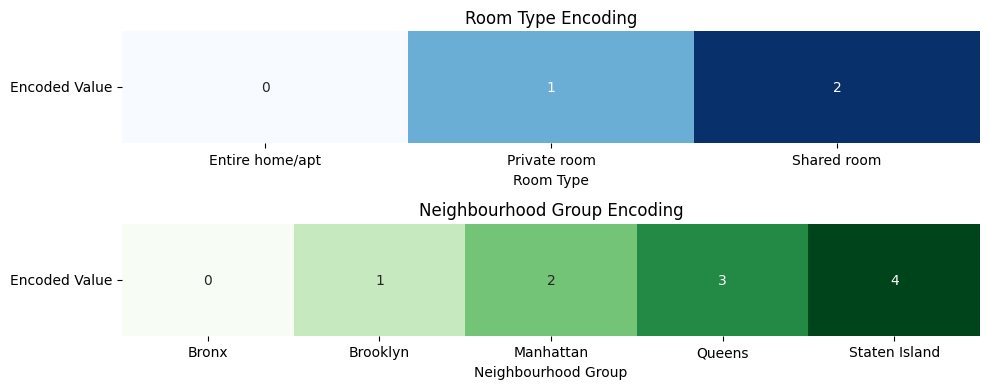

In [ ]:
#To be able to plot this first we need to save the mapping as a new df 

#Convert mappings to DataFrames
room_type_df = pd.DataFrame(list(room_type_mapping.items()), columns=['Room Type', 'Encoded Value'])
neigh_group_df = pd.DataFrame(list(neigh_group_mapping.items()), columns=['Neighbourhood Group', 'Encoded Value'])


#Plot both heatmap tables side by side
fig, axes = plt.subplots(2, 1, figsize=(10, 4))

#Room Type Encoding Heatmap
sns.heatmap(room_type_df.set_index('Room Type').T, annot=True, fmt='d', cbar=False, cmap="Blues", ax=axes[0])
axes[0].set_title("Room Type Encoding")
axes[0].set_ylabel("")
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)

#Neighbourhood Group Encoding Heatmap
sns.heatmap(neigh_group_df.set_index('Neighbourhood Group').T, annot=True, fmt='d', cbar=False, cmap="Greens", ax=axes[1])
axes[1].set_title("Neighbourhood Group Encoding")
axes[1].set_ylabel("")
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
#Saving the new df where each column only contains numerical values
cleaned_total_data_df = pd.DataFrame(cleaned_df).drop(columns=['neighbourhood_group','room_type'])

#Saving the new df to a csv file 
cleaned_total_data_df.to_csv("cleaned_total_data_df.csv", index=False)

cleaned_total_data_df.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_encoded,neighbourhood_group_encoded
property_id,,,,,,,,,,
0,2787,40.64749,-73.97237,149,1,9,6,365,1,1
1,2845,40.75362,-73.98377,225,1,45,2,355,0,2
2,4632,40.80902,-73.94190,150,3,0,1,365,1,2
3,4869,40.68514,-73.95976,89,1,270,1,194,0,1
4,7192,40.79851,-73.94399,80,10,9,1,0,0,2


ANALYSIS OF calculated_host_listings_count VALUES

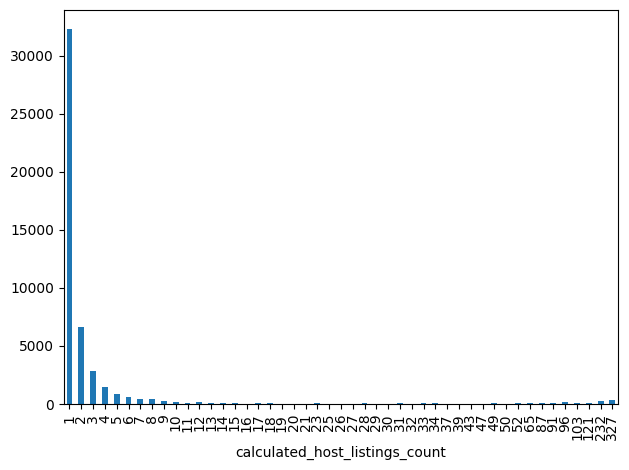

In [ ]:
#Histogram for host listing counts
counts = cleaned_total_data_df['calculated_host_listings_count'].value_counts().sort_index()
counts.plot(kind='bar')
plt.tight_layout()
plt.show()

After plotting the value counts of the variable in question we can see that the majority of the hosts have 1 property listed and this is backed by more than 30.000 records of hosts with 1 property 

PLOTTING FOR VISUAL UNDERSTANDING OF THE VARIABLES AND RELATIONS 

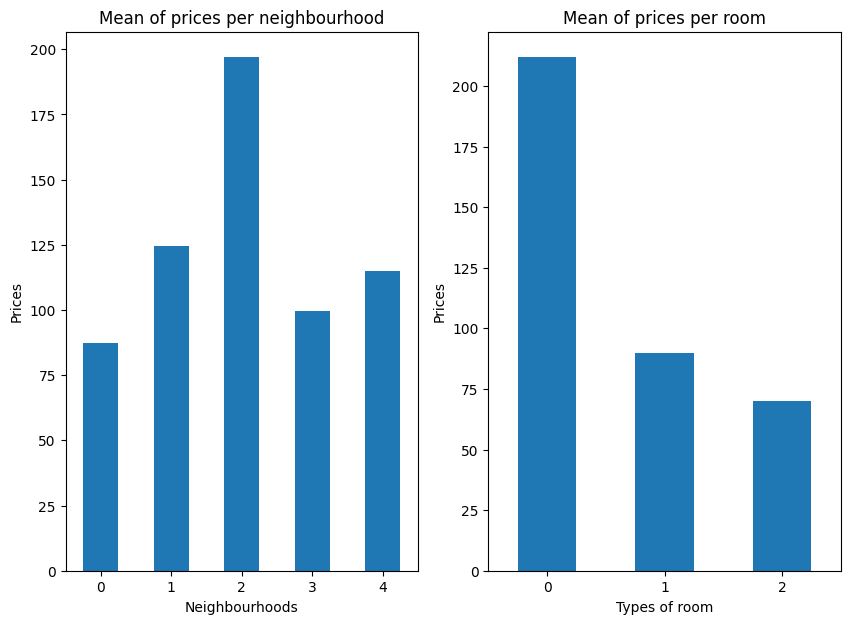

In [ ]:
#Grouping by neighbourhood group and calculate mean price
price_neighbourhood = cleaned_total_data_df.groupby('neighbourhood_group_encoded')['price'].mean()

#Converting to DataFrame (and reset index so it's plottable)
data_price_neighbourhood = pd.DataFrame(price_neighbourhood).reset_index()

#Saving the cleaned_df and the new filtered df 
data_price_neighbourhood.to_csv("data_price_neighbourhood.csv", index=False)


data_price_neighbourhood.head()

#Plotting Mean of prices per neighbourhood
fig, axis = plt.subplots(1, 2, figsize = (10, 7))

price_neighbourhood.plot(kind='bar', ax=axis[0])
axis[0].set_title('Mean of prices per neighbourhood')
axis[0].set_xlabel('Neighbourhoods')
axis[0].set_ylabel('Prices')
axis[0].tick_params(axis='x', labelrotation=0)


#Plotting Mean of prices per room 
price_room_type = cleaned_total_data_df.groupby('room_type_encoded')['price'].mean().reset_index()
price_room_type.to_csv("price_room_type.csv", index=False)

price_room_type.plot(
    kind='bar',
    x='room_type_encoded',
    y='price',
    ax=axis[1],
    legend=False
)
axis[1].set_title('Mean of prices per room')
axis[1].set_xlabel('Types of room')
axis[1].set_ylabel('Prices')
axis[1].tick_params(axis='x', labelrotation=0)

After plotting the relations between prices and neighbourhoods we can clearly see that the most expensive neighbourhood is the encoded number 2 which represents Manhattan, makes sense as this is in general one the most expensive neighbourhoods in N.Y City. Then, using the same logic we can conclude that the most expensive room type is the one encoded under the number 0 which represents a entire apartment and this also makes sense as is one of the most demandes types of stays in airbnb due to it's privacy 

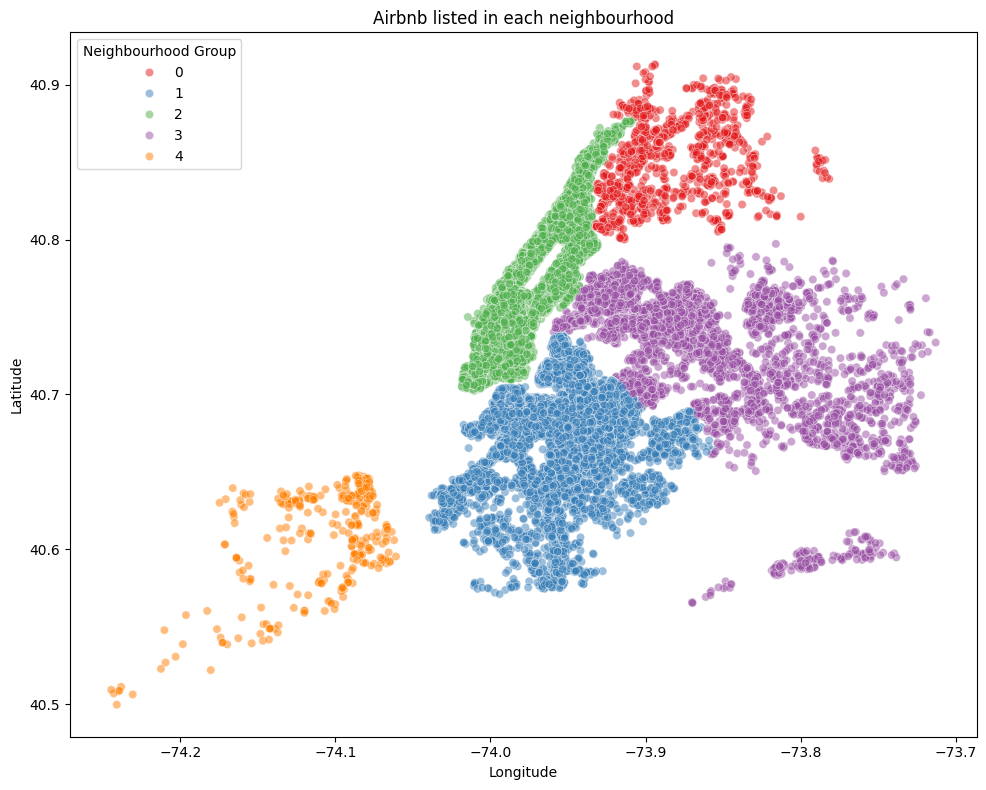

In [ ]:
#Map of distribution of Airbnb in NYC
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=cleaned_total_data_df, 
    x='longitude', 
    y='latitude', 
    hue='neighbourhood_group_encoded', 
    alpha=0.5, 
    palette='Set1'
)
plt.title('Airbnb listed in each neighbourhood')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood Group')
plt.tight_layout()
plt.show()

This maps shows the distribution of airbnb listed properties in New York City area

Adjusting the outliers in the price 

In [ ]:
#Adding one new column containing the log. value of price as we saw that there are multiple outliers in the price column, this creates a more approachable distribution
cleaned_total_data_df['log_price'] = np.log1p(cleaned_total_data_df.price) 
cleaned_total_data_df.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_encoded,neighbourhood_group_encoded,log_price
property_id,,,,,,,,,,,
0,2787,40.64749,-73.97237,149,1,9,6,365,1,1,5.010635
1,2845,40.75362,-73.98377,225,1,45,2,355,0,2,5.420535
2,4632,40.80902,-73.94190,150,3,0,1,365,1,2,5.017280
3,4869,40.68514,-73.95976,89,1,270,1,194,0,1,4.499810
4,7192,40.79851,-73.94399,80,10,9,1,0,0,2,4.394449


In [ ]:
#Clipping the numerical values of min minimum_nights to work with more normal distribution of data 
cleaned_total_data_df['cliped_minimum_nights'] = cleaned_total_data_df['minimum_nights'].clip(lower = 1, upper = 600)
cleaned_total_data_df.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_encoded,neighbourhood_group_encoded,log_price,cliped_minimum_nights
property_id,,,,,,,,,,,,
0,2787,40.64749,-73.97237,149,1,9,6,365,1,1,5.010635,1
1,2845,40.75362,-73.98377,225,1,45,2,355,0,2,5.420535,1
2,4632,40.80902,-73.94190,150,3,0,1,365,1,2,5.017280,3
3,4869,40.68514,-73.95976,89,1,270,1,194,0,1,4.499810,1
4,7192,40.79851,-73.94399,80,10,9,1,0,0,2,4.394449,10


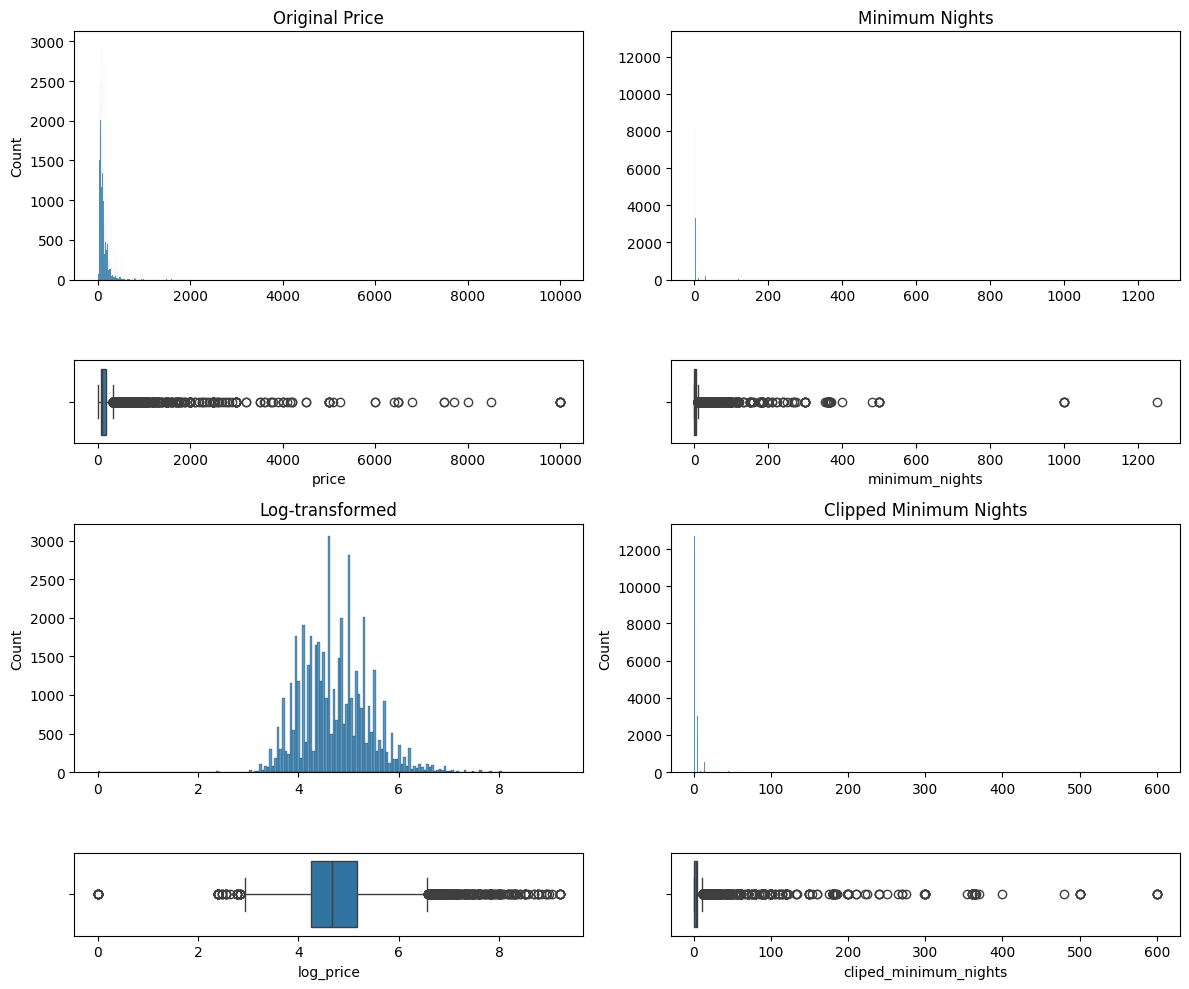

In [ ]:
#Confirmation of the distribution of the values after log_price and clipping 
fig, axis = plt.subplots(4, 2, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1, 3, 1]})

# Histogram and boxplot for original price
sns.histplot(ax=axis[0, 0], data=cleaned_total_data_df, x="price").set(title="Original Price", xlabel=None)
sns.boxplot(ax=axis[1, 0], data=cleaned_total_data_df, x="price")

# Histogram and boxplot for log-transformed
sns.histplot(ax=axis[2, 0], data=cleaned_total_data_df, x="log_price").set(title="Log-transformed", xlabel=None)
sns.boxplot(ax=axis[3, 0], data=cleaned_total_data_df, x="log_price")

# Histogram and boxplot for minimum nights
sns.histplot(ax=axis[0, 1], data=cleaned_total_data_df, x="minimum_nights").set(title="Minimum Nights", xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=cleaned_total_data_df, x="minimum_nights")

# Histogram and boxplot for clipped minimum nights
sns.histplot(ax=axis[2, 1], data=cleaned_total_data_df, x="cliped_minimum_nights").set(title="Clipped Minimum Nights", xlabel=None)
sns.boxplot(ax=axis[3, 1], data=cleaned_total_data_df, x="cliped_minimum_nights")

plt.tight_layout()
plt.show()

After cliping and log_price has been applied, we can clearly see that now we have a 'better' distribution of the data 

DATA PARTITION

In [ ]:
#Dropping the columns 
X = cleaned_total_data_df.drop(['log_price','price','minimum_nights'], axis=1)

#Defining y value
y = cleaned_total_data_df['log_price']

#Establishing relations
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Confirming the new shape of X_train
X_train.shape

(39116, 9)

In [ ]:
#Confirming the new shape of X_test (This one will not be used as part of the training model)
X_test.shape

(9779, 9)

INLFUYENT OBSERVATIONS

In [ ]:
#Adjusting the model
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()

#Instancing the influence and obtaining cooks distance for each observation
cooks_distance = model.get_influence().cooks_distance

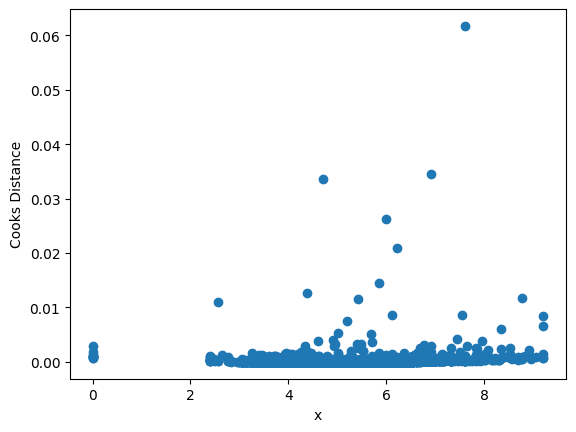

In [ ]:
#Plotting cooks distance
plt.scatter(y_train, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
cut_point = 4/len(X_train)
print(cut_point)

0.00010225994477962981


In [ ]:
#Where the coef goes by the cut point
np.where(cooks_distance[0]>cut_point)[0]

array([   31,    34,    66, ..., 39080, 39083, 39108], shape=(1847,))

In [ ]:
#Properties that are consider to be extreme and could potentially influence the performance of the model
idx_influyent_prop = np.where(cooks_distance[0]>cut_point)[0]
print(f'Porcentaje de viviendas a desestimar: {len(idx_influyent_prop)/len(cleaned_total_data_df)*100} %')

Porcentaje de viviendas a desestimar: 3.7774823601595253 %


We can see that there is less than 4% of observations are influyent

In [ ]:
X_train.index[idx_influyent_prop]

Index([44177, 47400, 48849, 18605, 16463, 25390, 41224, 47091, 30259, 29576,
       ...
       48033, 33159,  5258,  2027, 35920, 48555, 41606, 11394,  1899, 37194],
      dtype='int64', name='property_id', length=1847)

In [ ]:
X_train1 = X_train.loc[~X_train.index.isin(X_train.index[idx_influyent_prop]),:]
y_train1 = y_train.loc[~X_train.index.isin(X_train.index[idx_influyent_prop])]
X_train1 = X_train1.copy()
X_train1['neighbourhood_group_encoded'] =cleaned_total_data_df.loc[X_train1.index, 'neighbourhood_group_encoded']
X_train1.columns

Index(['host_id', 'latitude', 'longitude', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'room_type_encoded', 'neighbourhood_group_encoded',
       'cliped_minimum_nights'],
      dtype='object')

For some reason the X_train1 dropped the column neighbourhood_group_encoded and I realised this was being drop by the time I plotted the correlations, in order to be able to add the column again (because did not found where the issue was) I manually added the column to X_train1 and confirmed that it was working

Importance of characteristics 

In [ ]:
#Defining xgb model 
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)

#df with new characteristics
dict_data = {'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100}
df_imp = pd.DataFrame(dict_data)

#Filtering in desc order
df_imp.sort_values(by='Importance', ascending=False, inplace=True)

Evaluation of the importances 

In [ ]:
#Name of the columns with an importance greater than 1% 
df_imp[df_imp['Importance']>=1]

,Feature,Importance
6,room_type_encoded,83.538231
2,longitude,3.867435
1,latitude,2.700159
4,calculated_host_listings_count,2.180916
8,cliped_minimum_nights,2.158582
5,availability_365,2.118591
3,number_of_reviews,1.626791


After analyzing the new importances dataframe we can conclude that the variable with the greatest importance is room_type_encoded that makes reference to the type of living space you will be getting by the time you rent the airbnb and it makes full sense that the price prediction is almost fully related to the room type  

In [ ]:
#Deleting irrelevant car
X_train1.drop(df_imp[df_imp['Importance']<1]['Feature'], axis=1, inplace=True)
X_test.drop(df_imp[df_imp['Importance']<1]['Feature'], axis=1, inplace=True)

VIF (Variance inflation factor)

In [ ]:
vif = pd.Series([variance_inflation_factor(X_train1.corr().values, i) for i in range(X_train1.corr().shape[1])], index=X_train1.columns)
vif

host_id                           1.582270
latitude                          1.862424
longitude                         1.580311
number_of_reviews                 1.533013
calculated_host_listings_count    1.652213
availability_365                  2.101159
room_type_encoded                 1.301231
neighbourhood_group_encoded       2.155822
cliped_minimum_nights             1.584503
dtype: float64

All the features have VIF values greater than 1, indicating some correlation among predictors, which is normal. However, all VIF values are well below 5, which is commonly used as a threshold to indicate problematic multicollinearity therefore, multicollinearity is not a serious concern in this dataset, and all variables can be safely included in the regression model without significant risk of inflated standard errors due to collinearity.

EXPLORING CORRELATIONS

<Axes: >

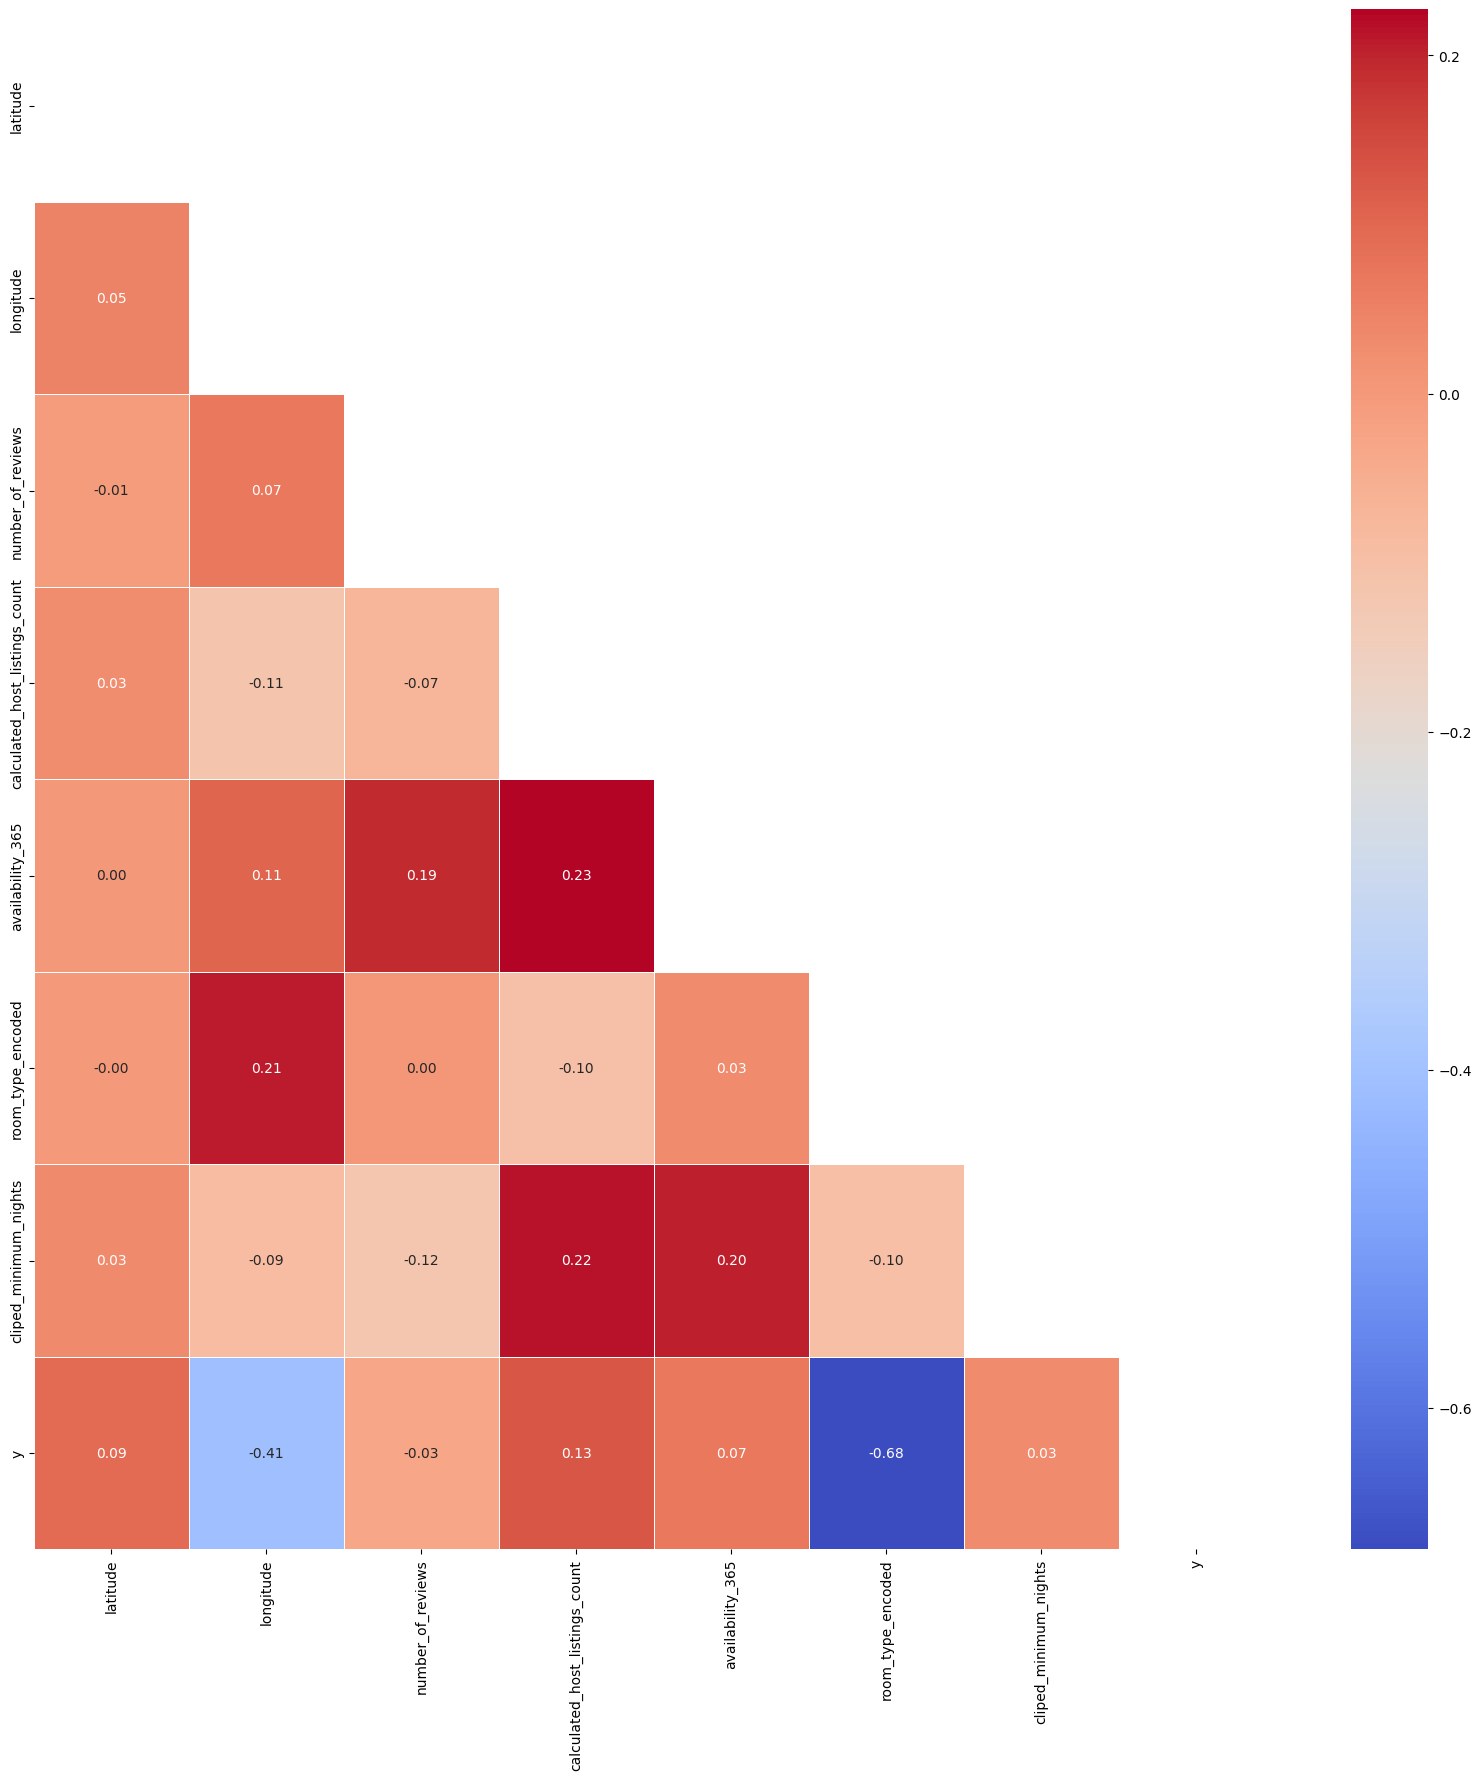

In [ ]:
#Plotting the correlations between variables 
X_corr = X_train1.copy()
X_corr['y'] = y_train1
corr = X_corr.corr()


mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,20))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')


The strongest correlation with the target variable Y is with room_type_encoded (-0.68), indicating a strong negative relationship. Longitude also shows a moderate negative correlation (-0.41) with Y. Other variables have weak or negligible correlations.

SCALING

In [ ]:
scaler = StandardScaler()

X_train_sc = pd.DataFrame(scaler.fit_transform(X_train1), columns=X_train1.columns, index=X_train1.index)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [ ]:
X_test_sc

,latitude,longitude,number_of_reviews,calculated_host_listings_count,availability_365,room_type_encoded,cliped_minimum_nights
property_id,,,,,,,
879,-1.617773,-0.608464,0.893406,-0.182387,0.613483,-0.927673,-0.273229
44383,-0.430004,1.056189,-0.536282,-0.182387,-0.278945,0.925237,1.161934
15394,0.595558,-0.903192,-0.144271,-0.182387,-0.840559,0.925237,-0.352960
43230,-0.411750,-1.387031,-0.420985,10.942495,1.252030,-0.927673,-0.352960
16332,1.262078,0.459597,0.155503,-0.182387,-0.609758,-0.927673,-0.352960
...,...,...,...,...,...,...,...
20477,-0.076797,-0.930072,-0.121211,-0.182387,-0.317411,-0.927673,-0.352960
44969,0.639967,-0.728116,-0.536282,-0.011760,1.421284,0.925237,-0.432691
36577,0.557546,2.822892,-0.420985,-0.080011,-0.802092,0.925237,-0.432691
